In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
!pip install seaborn==0.12.0
!pip install category_encoders

--2022-12-08 08:08:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  24.9MB/s    in 0.2s    

2022-12-08 08:08:52 (24.9 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-12-08 08:08:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1.9M) [application/x-httpd-php]
Saving to: ‘adult.test’

adult.test          100%[===================>]   1.91M  --.-KB/s    in 0.1s    

2022

In [ ]:
# >50K, <=50K.

# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [ ]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
headers = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv("adult.data", names=headers, skipinitialspace=True)
df_test = pd.read_csv("adult.test", names=headers, skipinitialspace=True)
df_test = df_test.iloc[1: , :]

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


### 1. Explore the dataset

#### Income distribution

<=50K    24720
>50K      7841
Name: income, dtype: int64


AttributeError: ignored

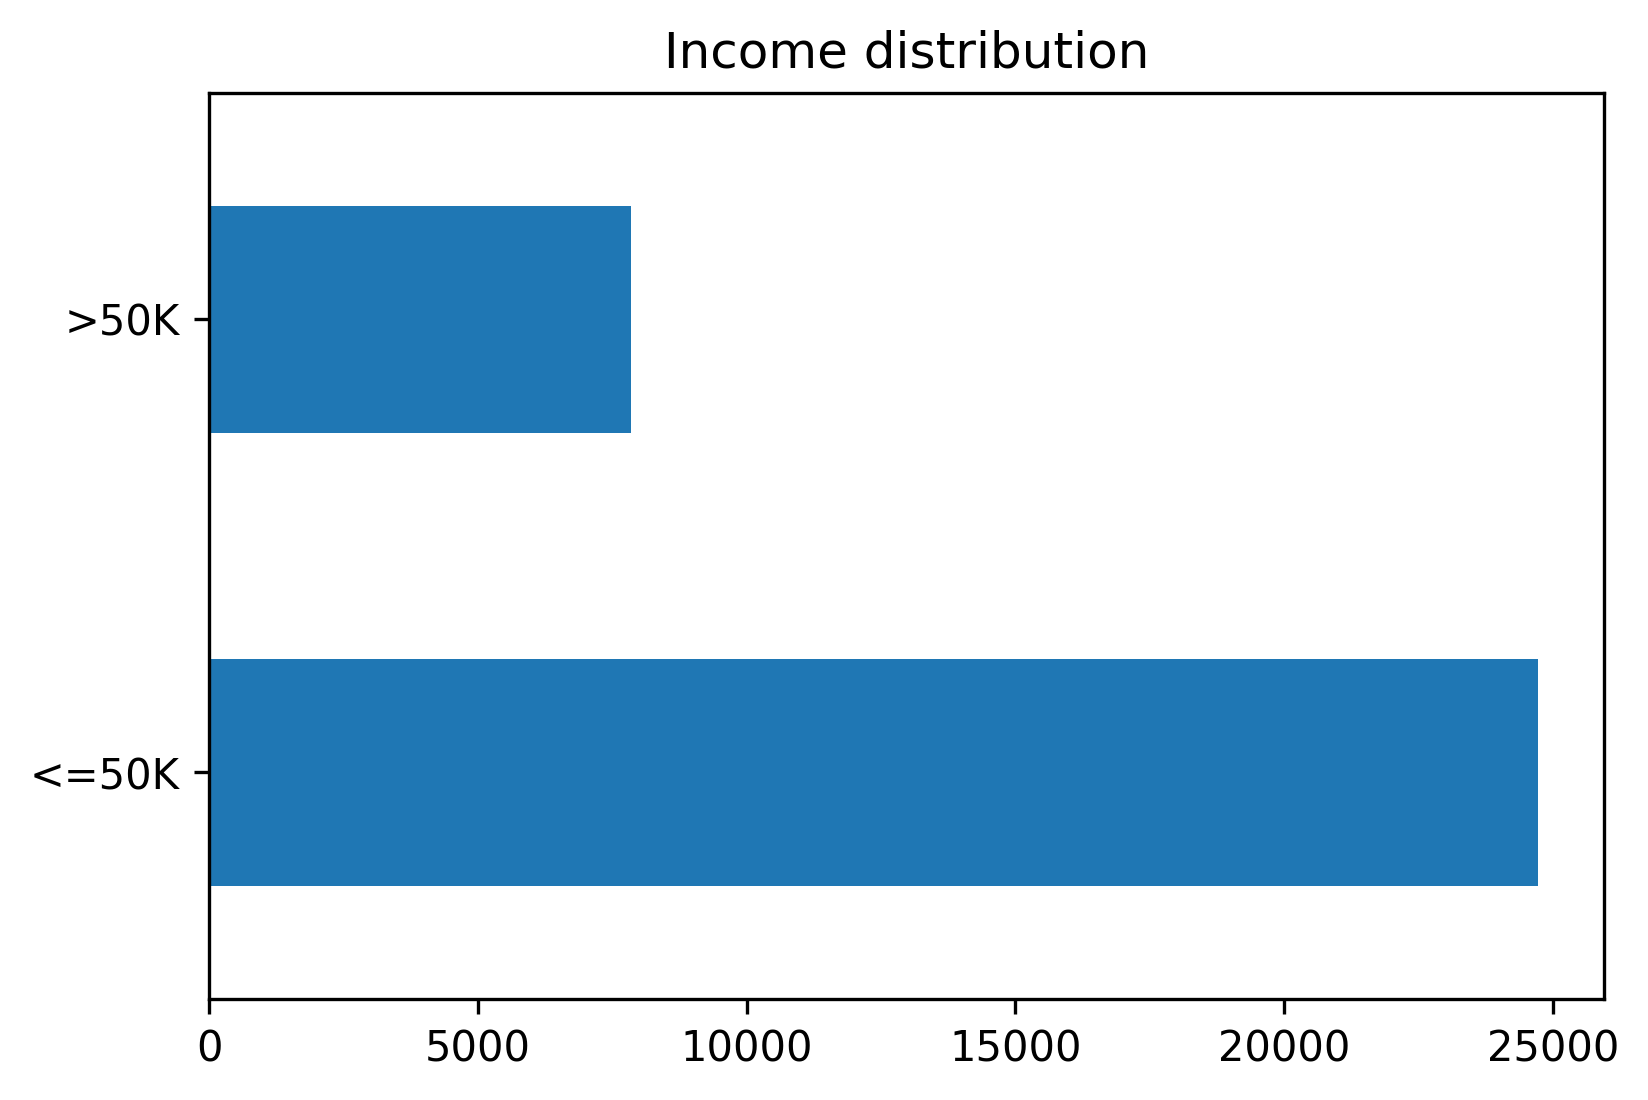

In [ ]:
# Overall income distribution
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

print(df.income.value_counts())
pd.options.plotting.backend = 'matplotlib'
df.income.value_counts().plot(kind='barh', title="Income distribution")
sns.plt.show()

#### Age feature

In [ ]:
# Overall age distribution
print(df.age.value_counts().sort_index())
sns.histplot(df.age, bins=20, kde=True)
plt.xlabel("Age")
plt.show()
# df.age.hist()

In [ ]:
# Plot the mean and standard deviation of age given income class
# df.groupby("income").age.agg([np.mean, np.std]).plot(kind="barh", xerr="std", legend=False)
sns.boxplot(data=df, x='age', y='income')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

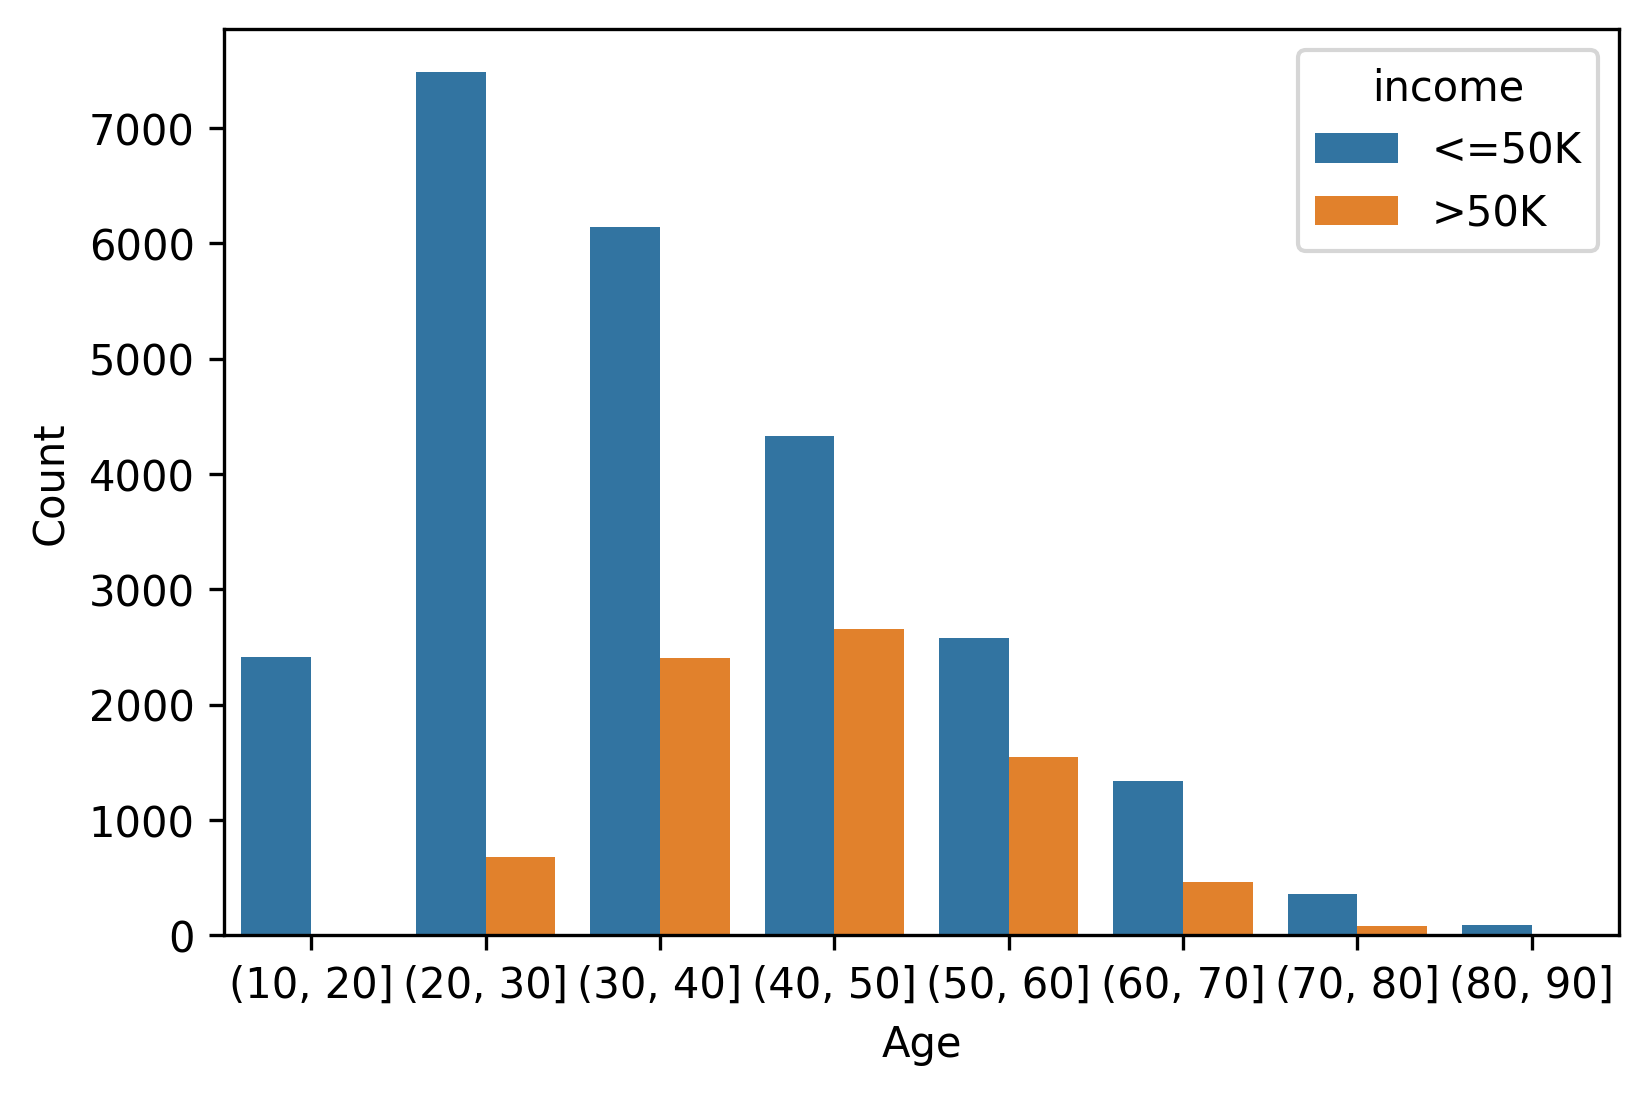

In [ ]:
# Now we group ages to different groups and plot the income of each group
df['age_binned'] = pd.cut(df.age, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
# df_age = df.groupby("age_binned").income.value_counts().unstack(level=1)
sns.countplot(data=df, x='age_binned', hue='income')
plt.xlabel("Age")
plt.ylabel("Count")
# sns.barplot(x=df.groupby("age_binned").income.value_counts().index, y=df.groupby("age_binned").income.value_counts())
df = df.drop(["age_binned"], axis=1)

#### Workclass feature

In [ ]:
# Overall workclass distribution
print(df.workclass.value_counts().sort_index())
# df.workclass.value_counts().sort_index().plot(kind='bar')
# Note that we have 1836 null values

?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
Name: workclass, dtype: int64


In [ ]:
# Plot the mean and standard deviation of age given income class
# df.groupby("income").workclass.value_counts().unstack(level=1).plot(kind='barh')

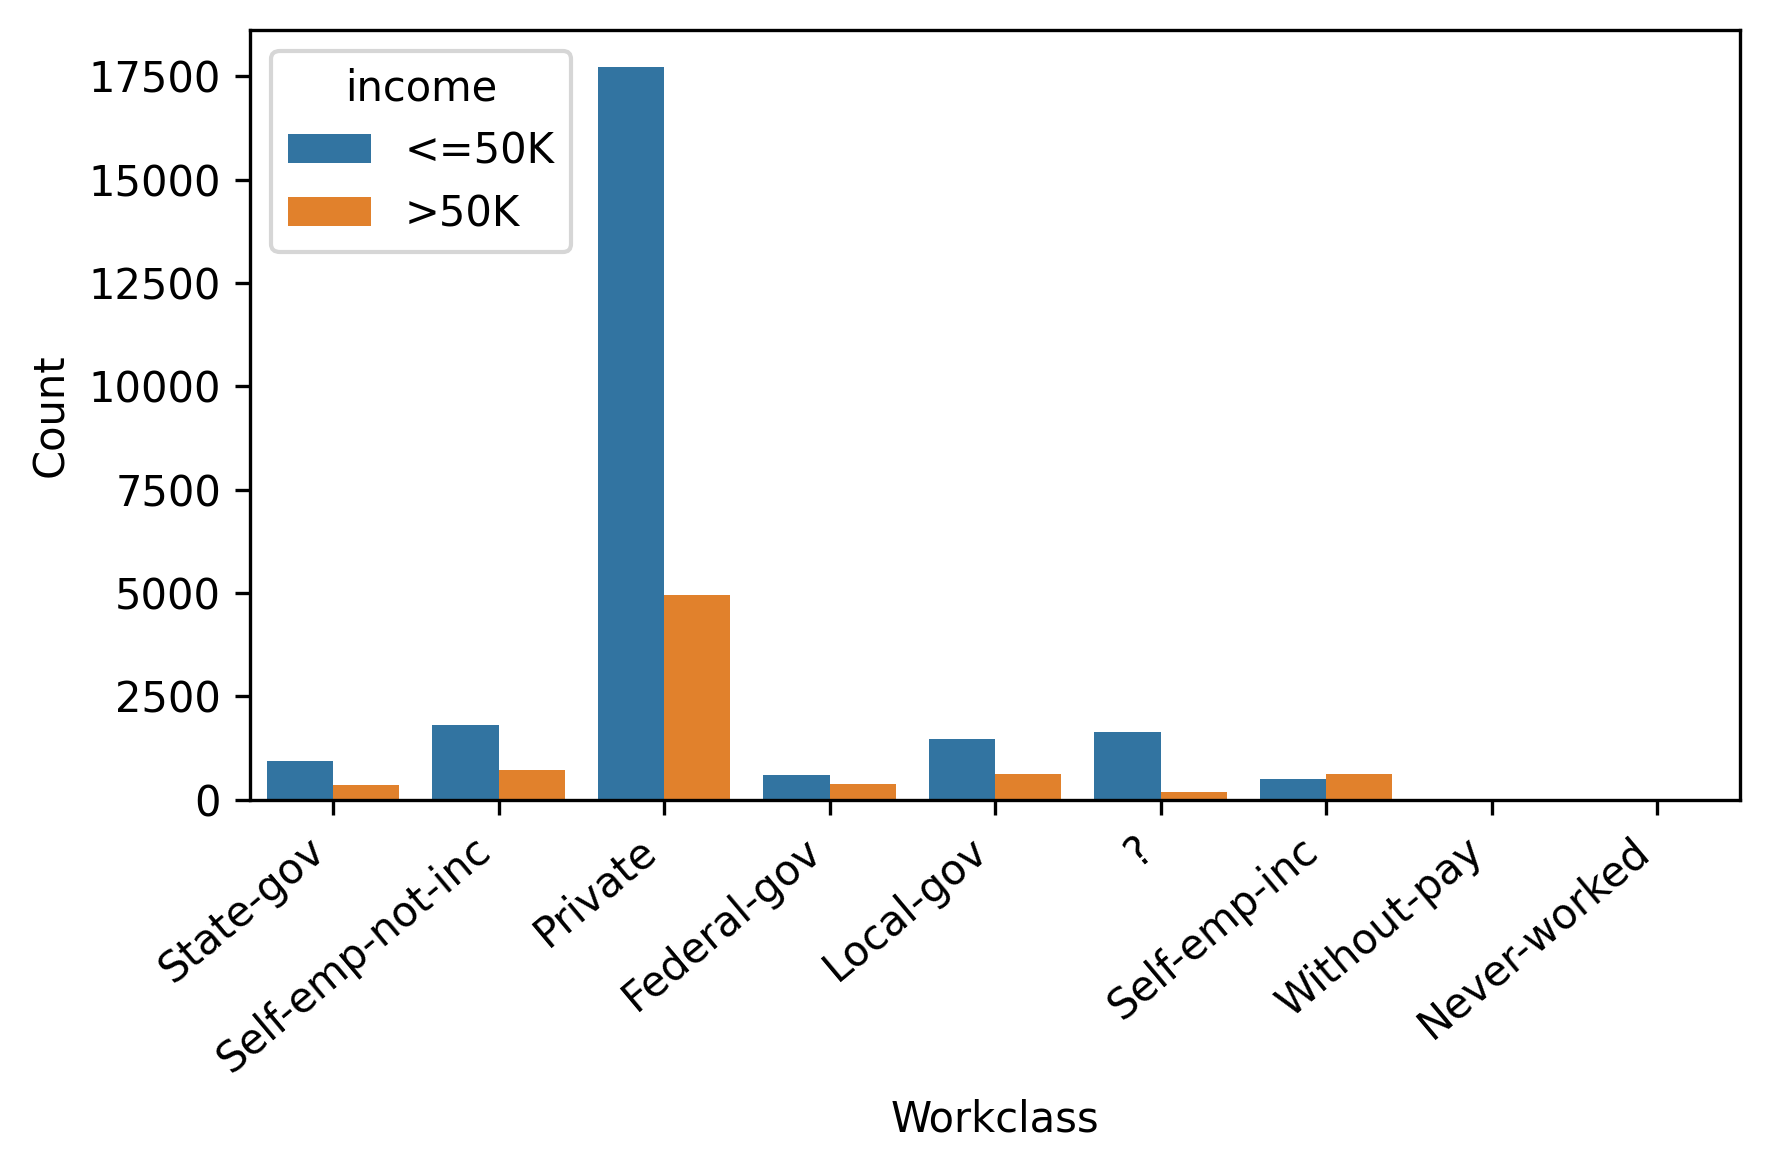

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='workclass', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

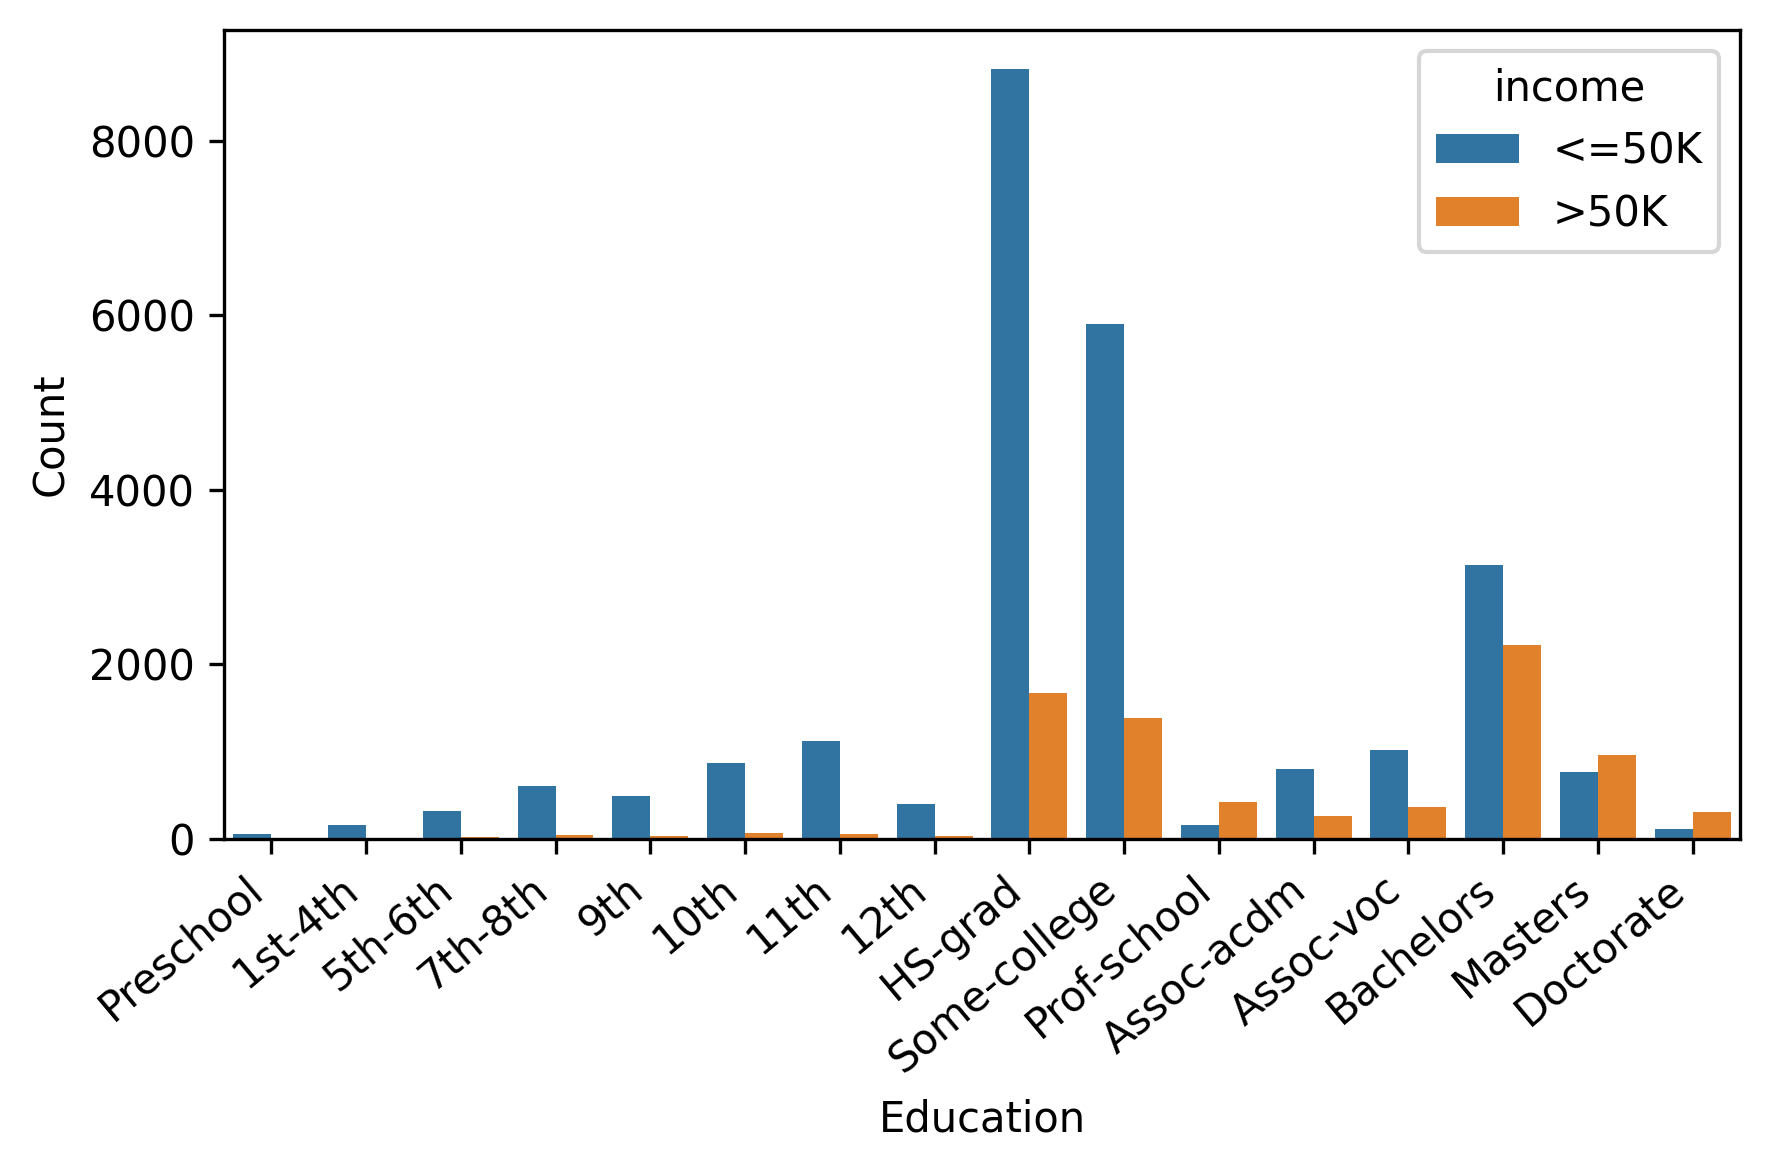

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='education', hue='income', order=["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Prof-school", "Assoc-acdm", "Assoc-voc",  "Bachelors", "Masters", "Doctorate"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Education")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Education feature

In [ ]:
print(df['education-num'].value_counts().sort_index())

1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: education-num, dtype: int64


Text(0, 0.5, 'Count')

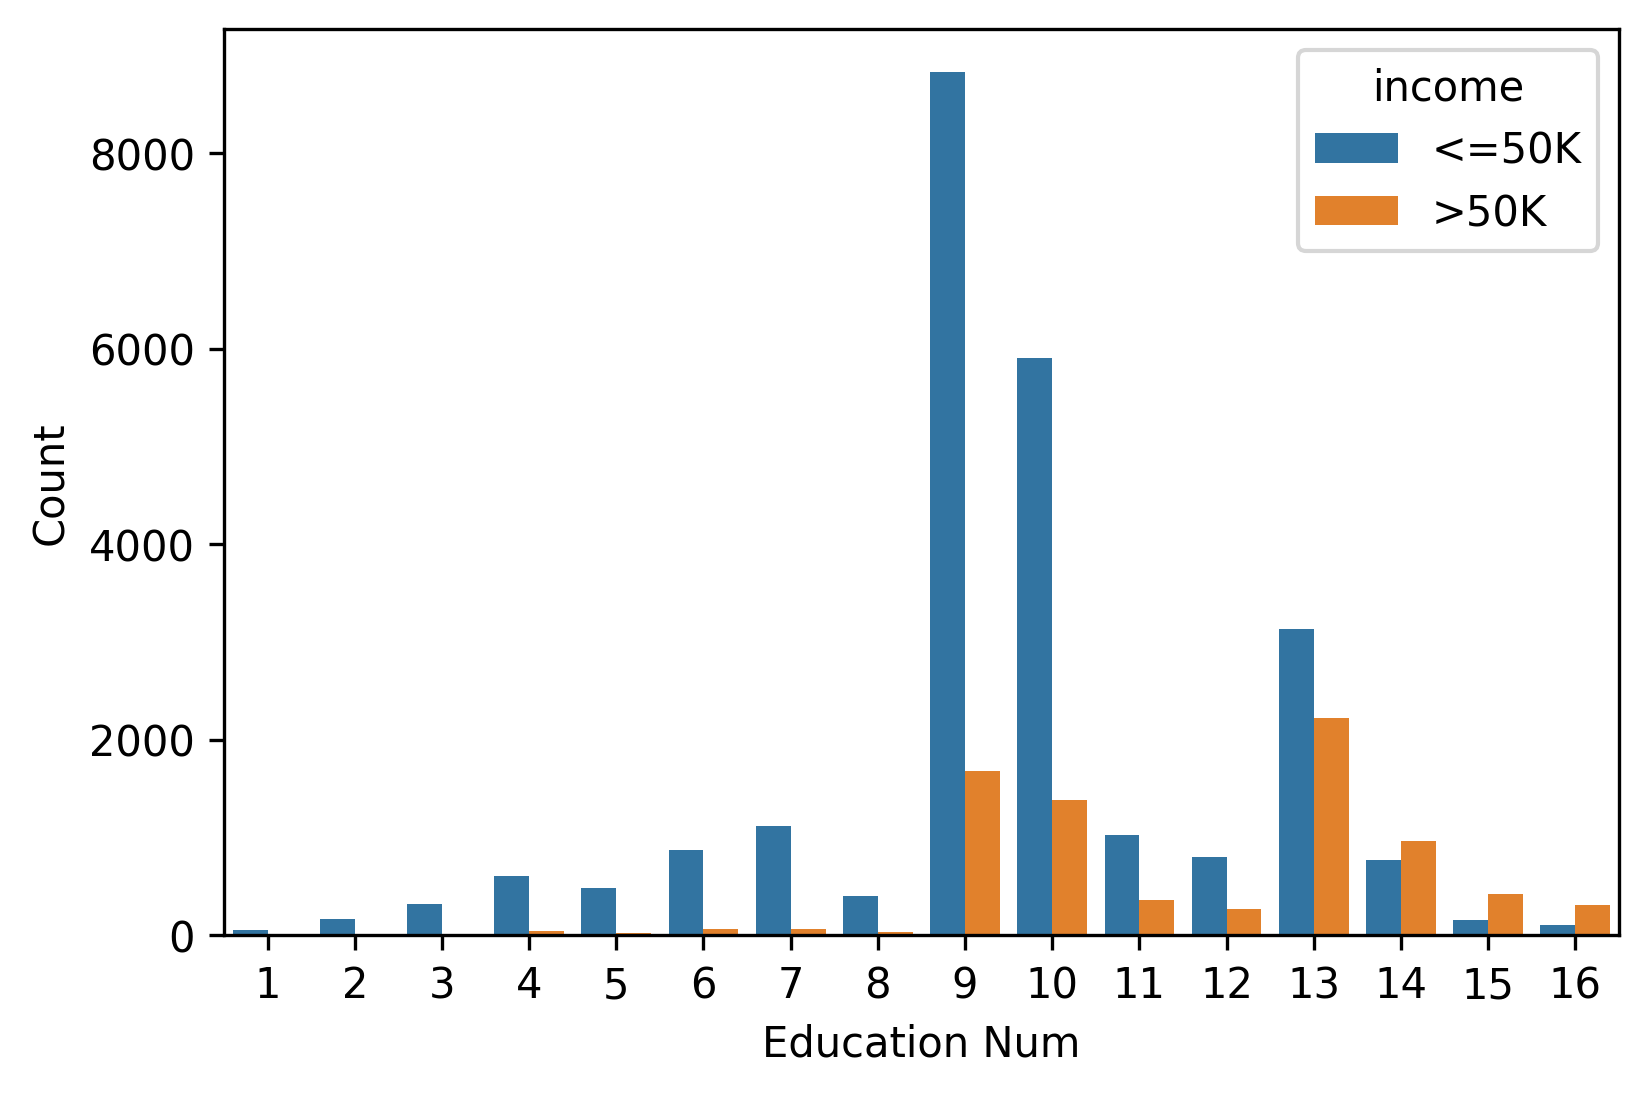

In [ ]:
# Now we group ages to different groups and plot the income of each group
# df_age = df.groupby("age_binned").income.value_counts().unstack(level=1)
sns.countplot(data=df, x='education-num', hue='income')
plt.xlabel("Education Num")
plt.ylabel("Count")

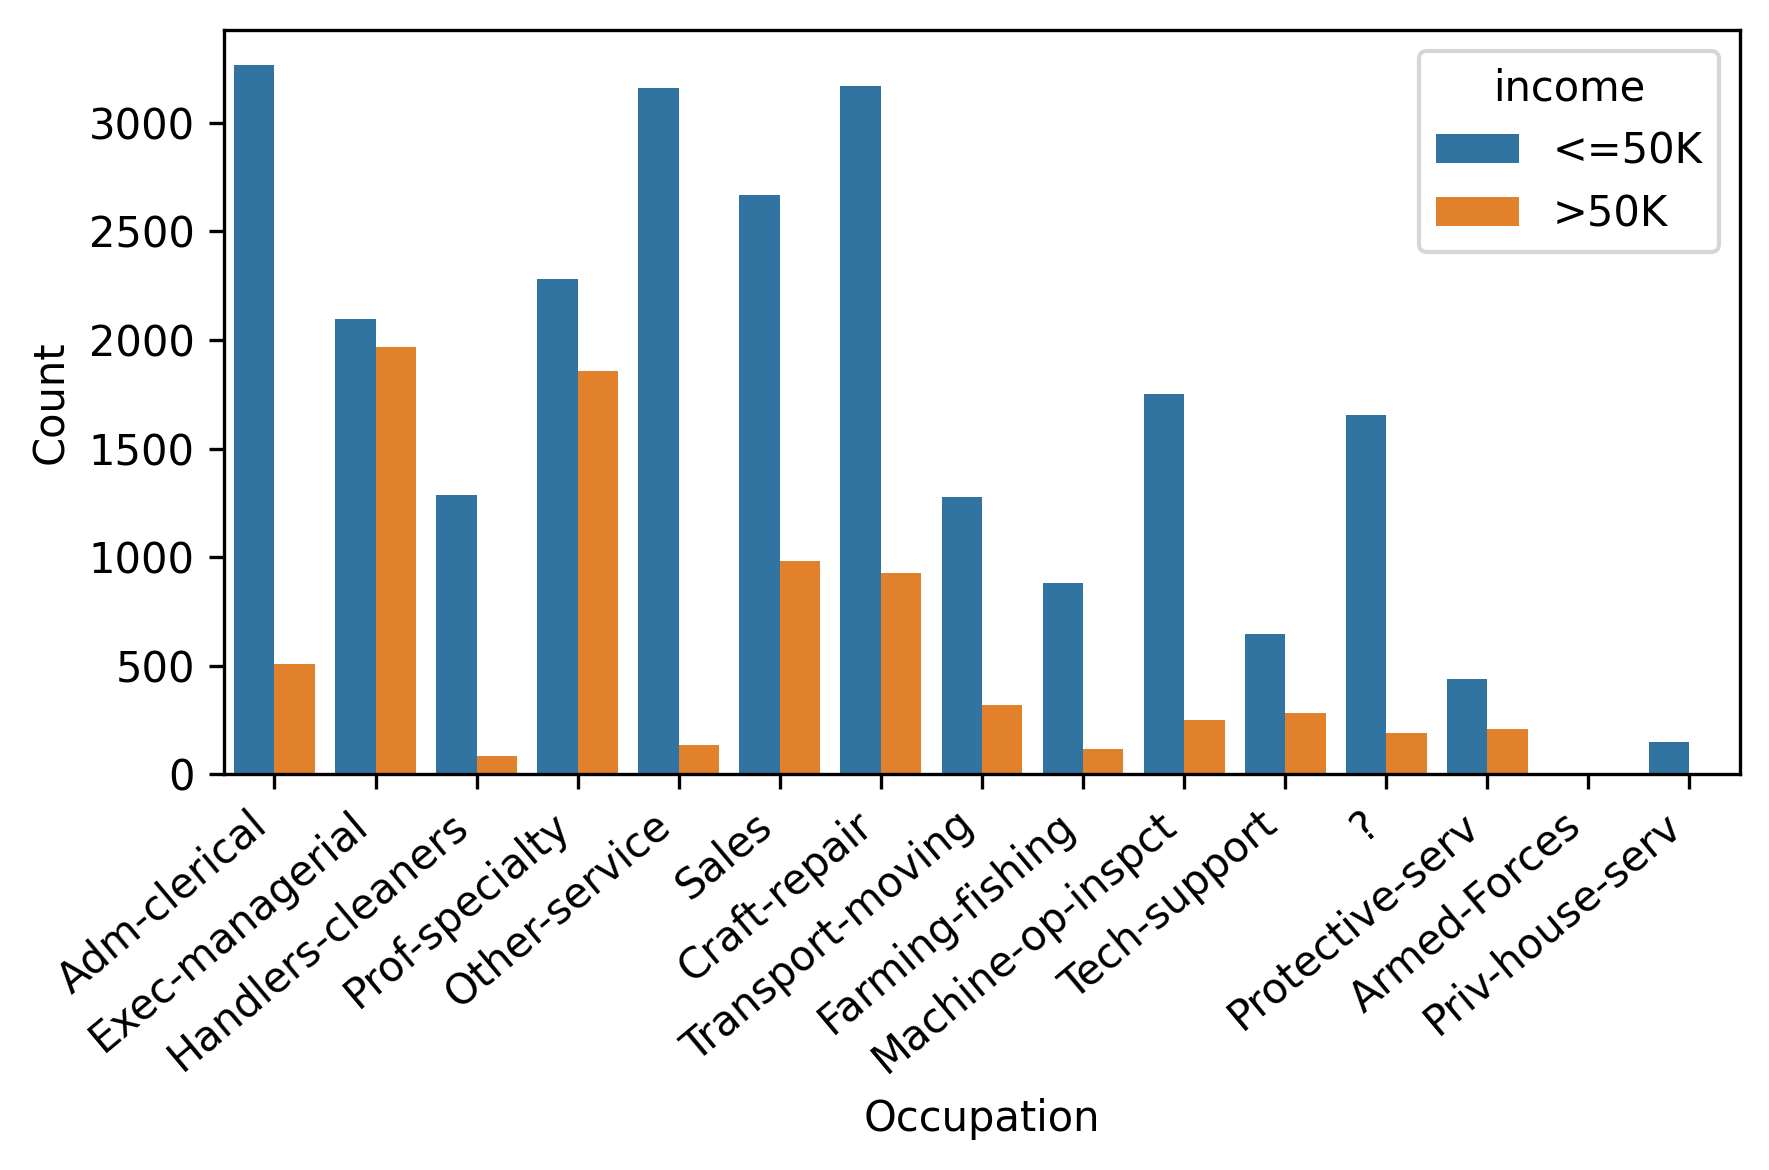

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='occupation', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

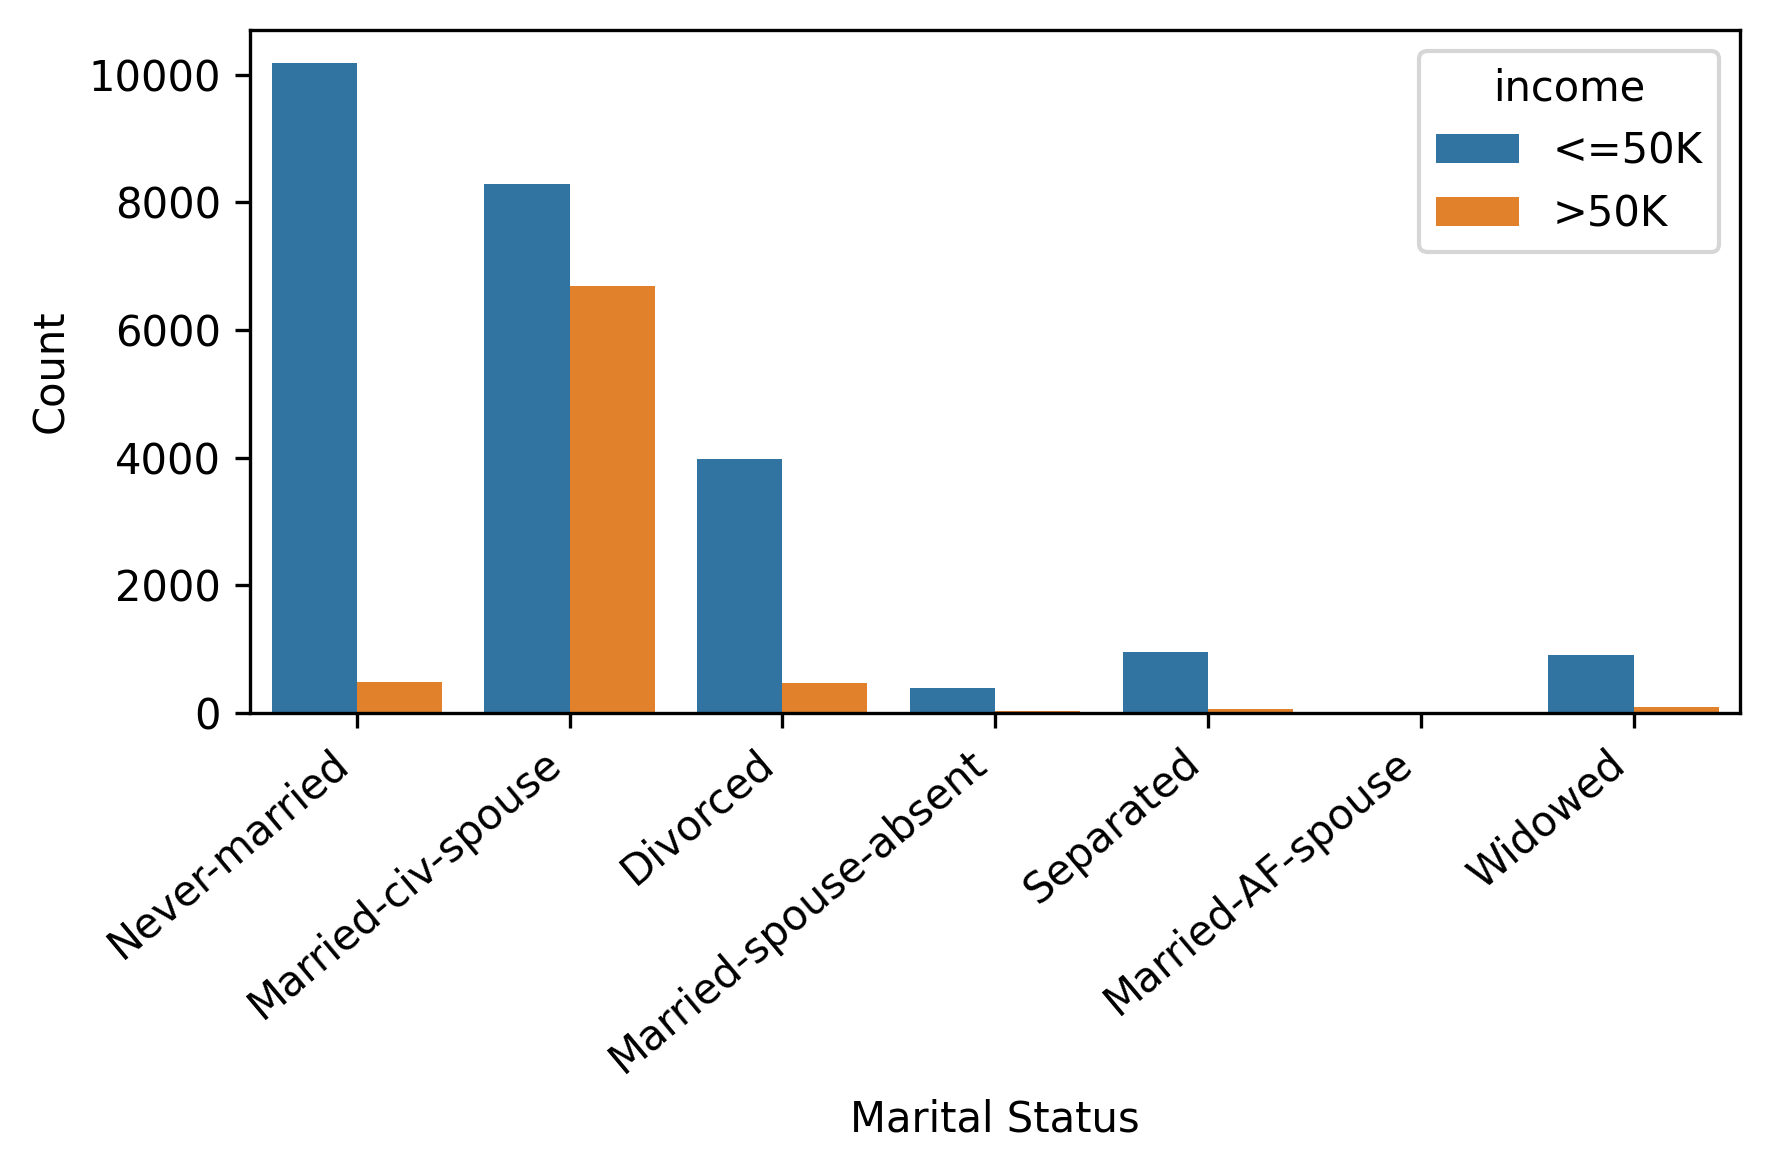

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='marital-status', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

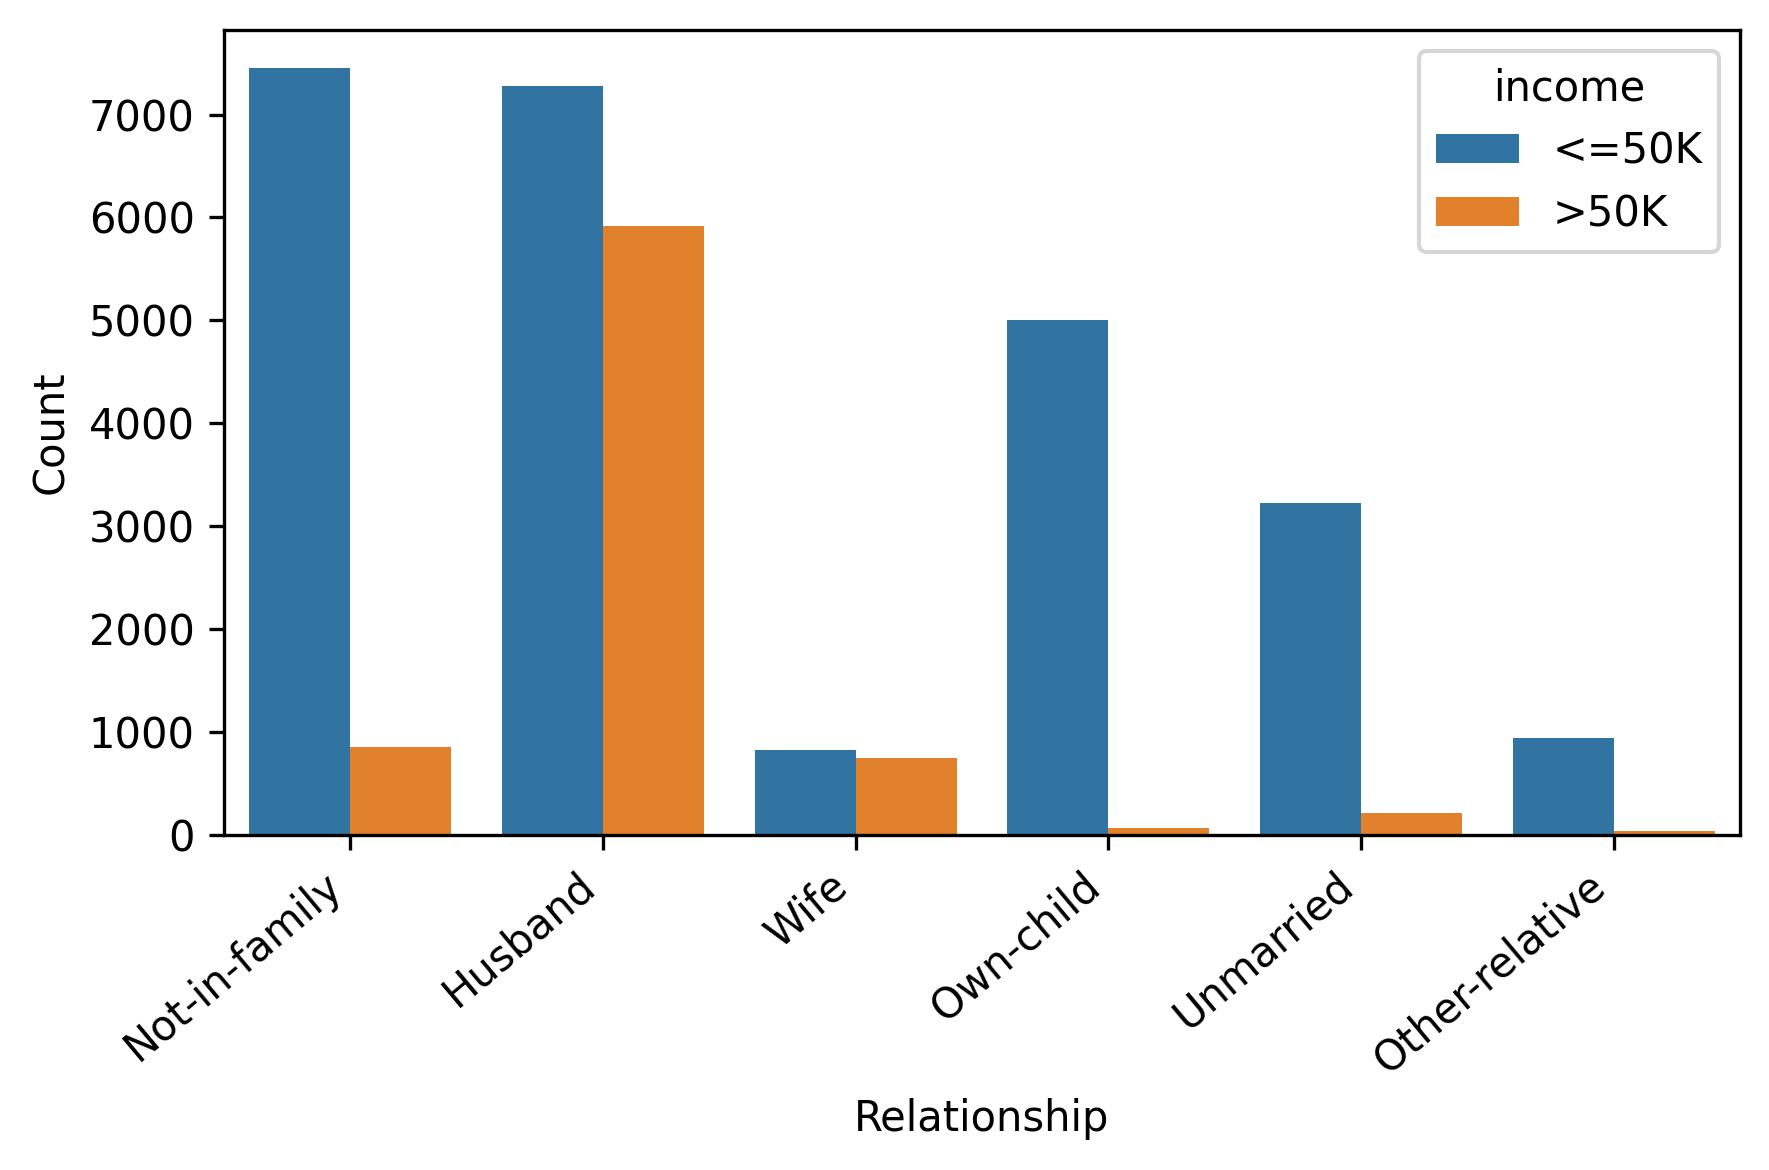

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='relationship', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

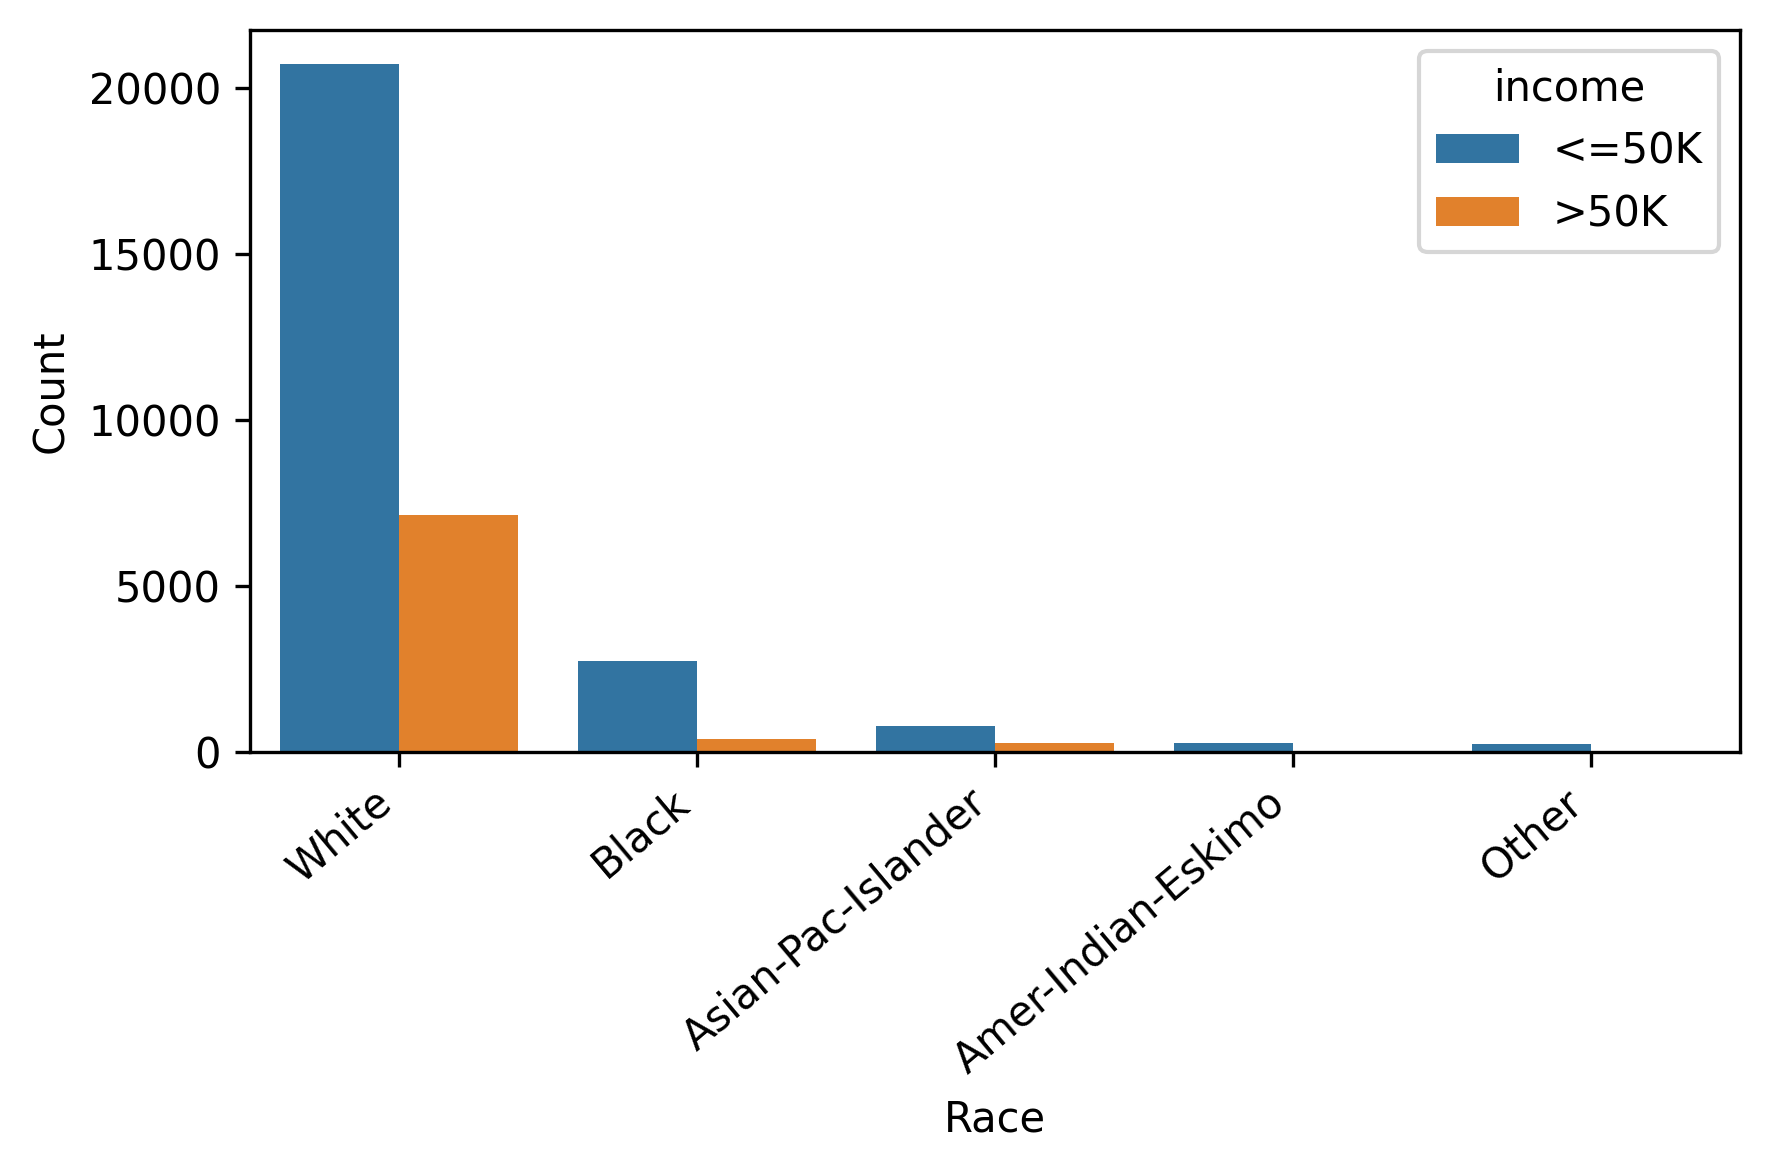

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='race', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Race")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

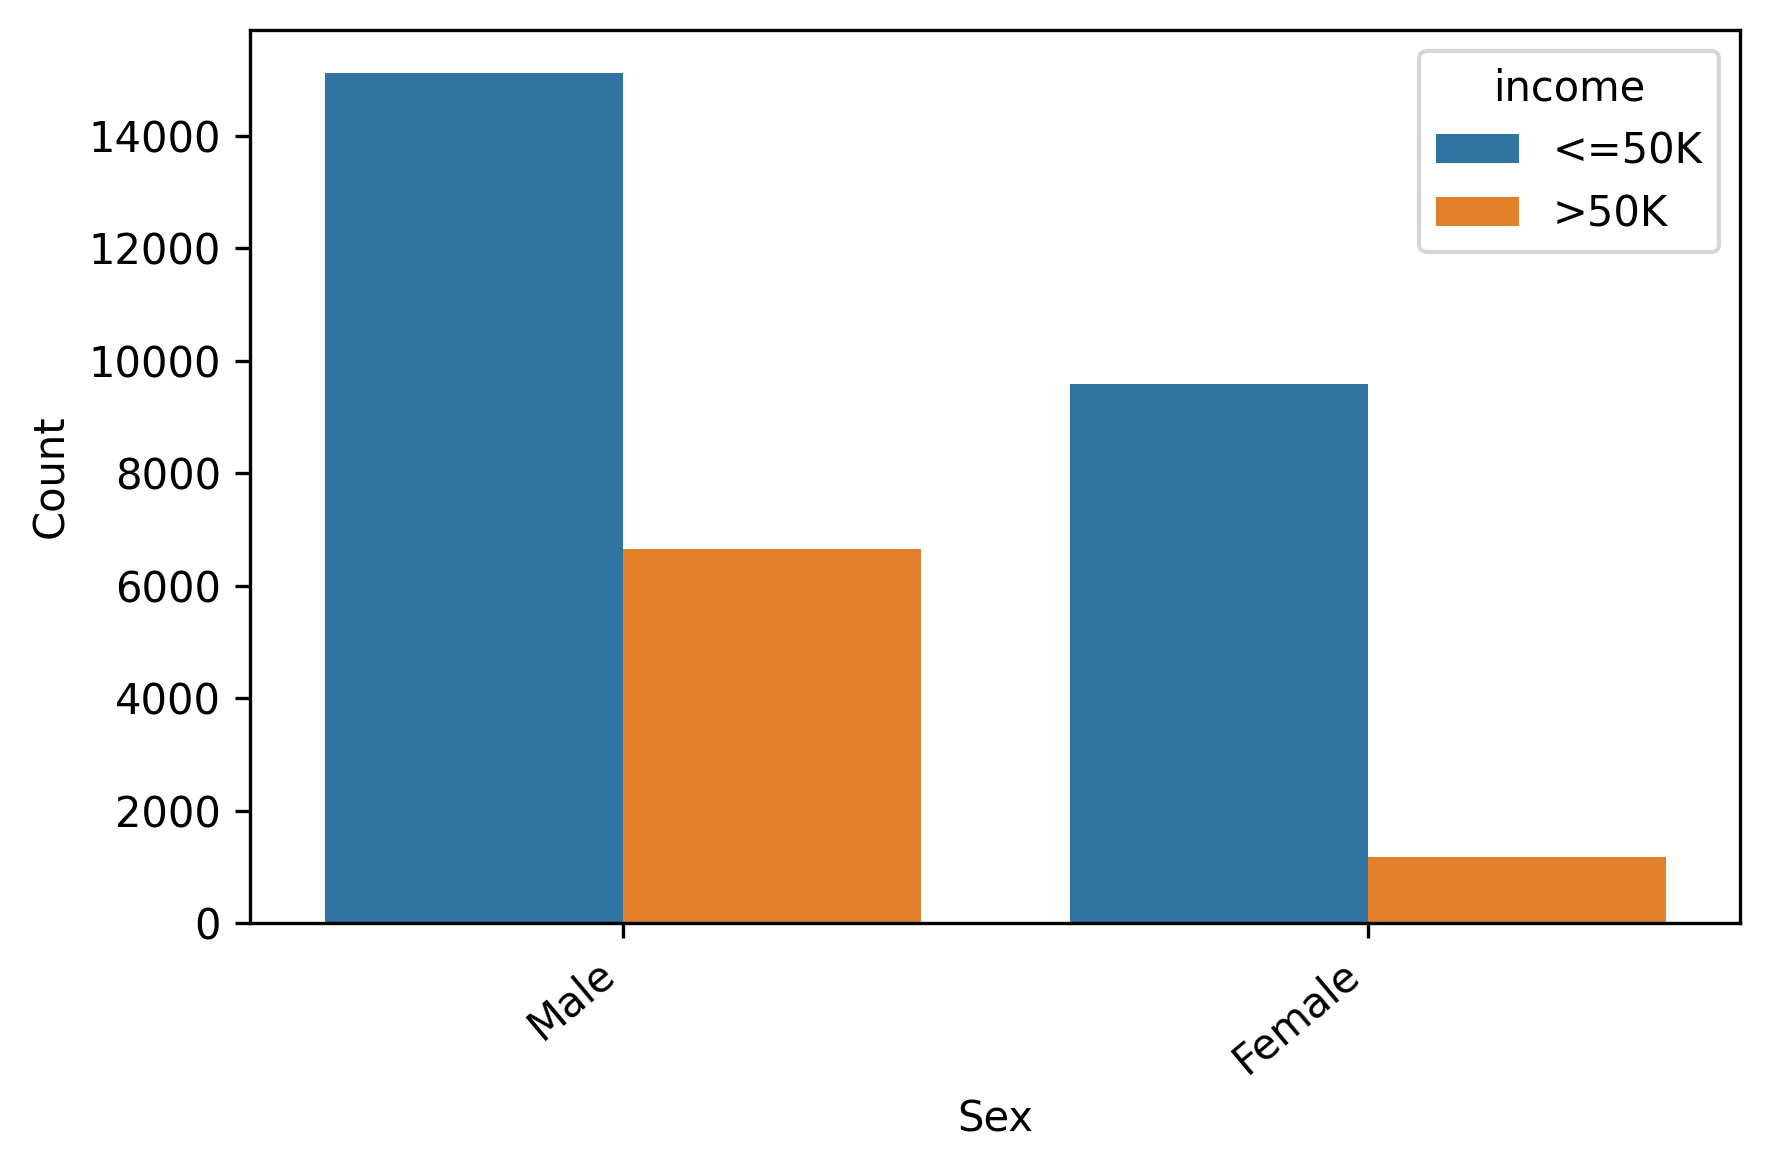

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='sex', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

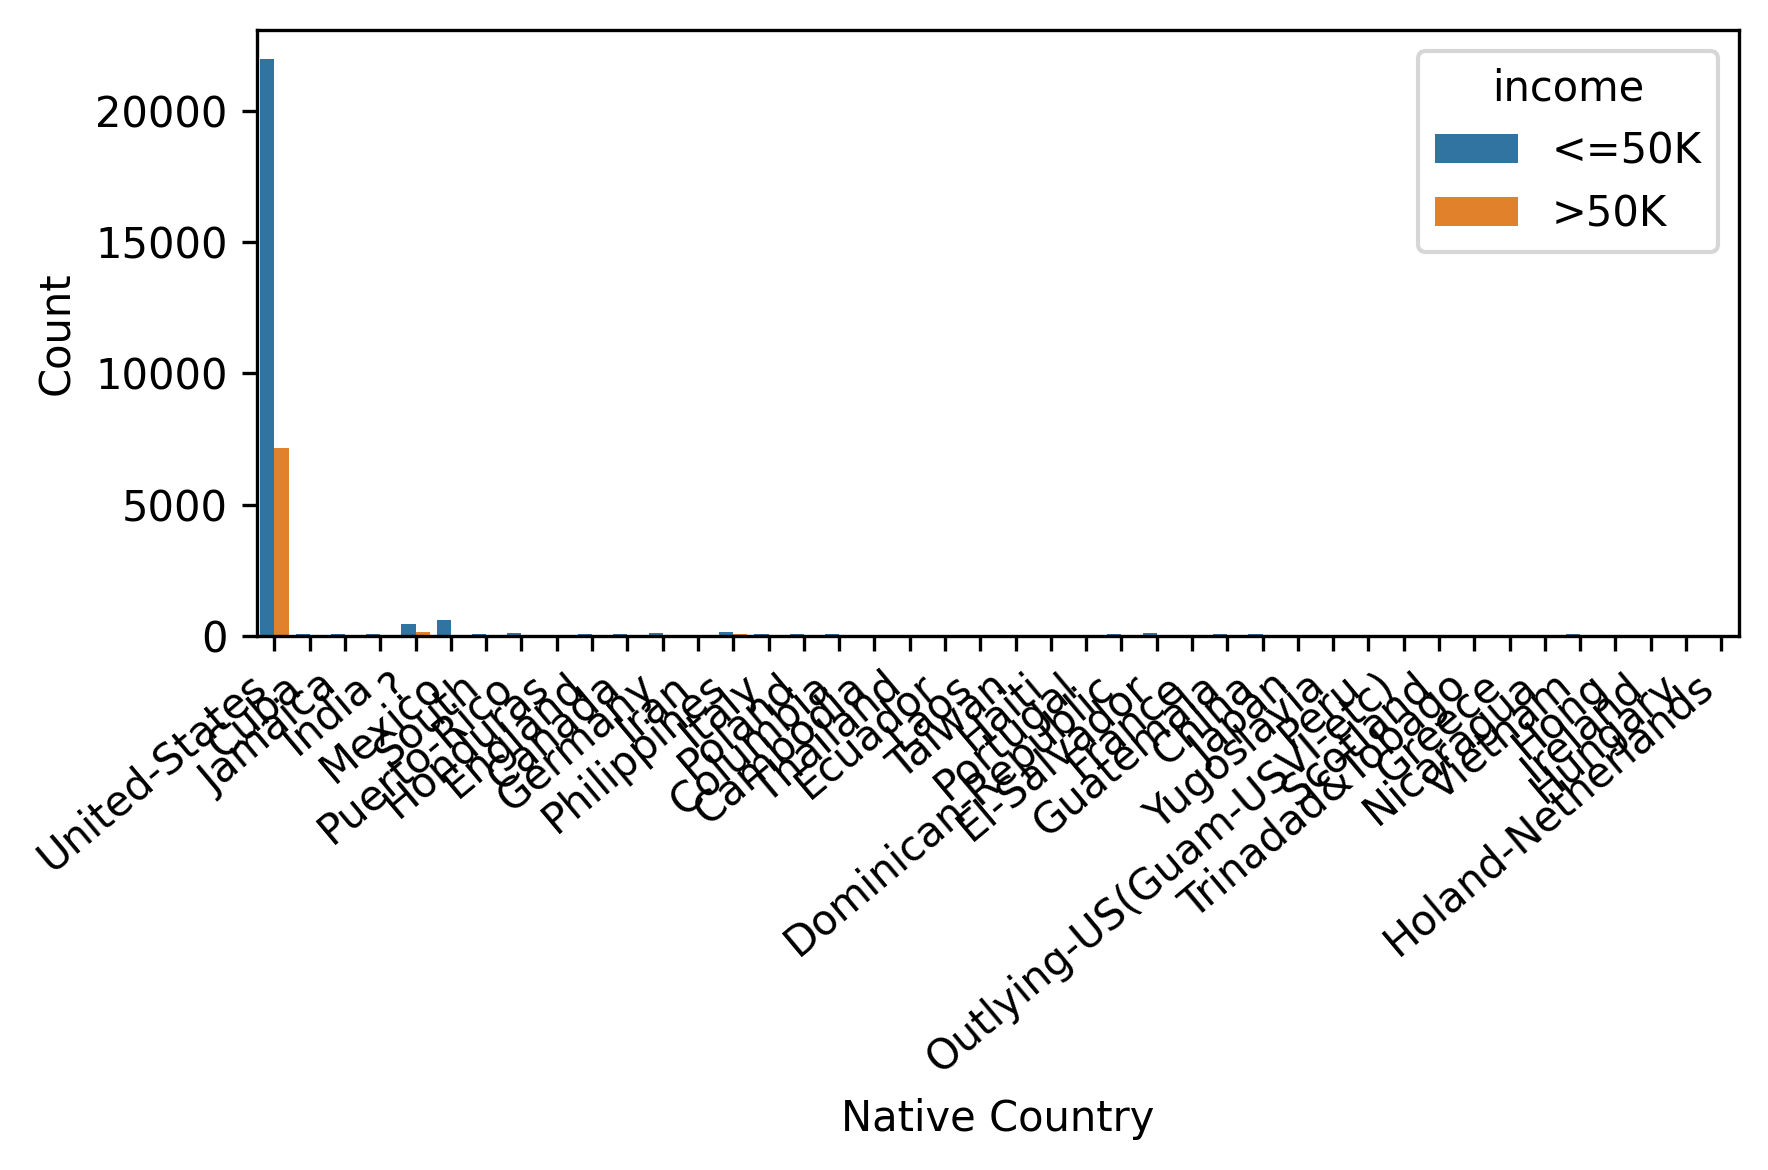

In [ ]:
# df.groupby("workclass").income.value_counts().unstack(level=1).plot(kind='bar')
ax = sns.countplot(data=df, x='native-country', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Native Country")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [ ]:
df['capital-gain'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

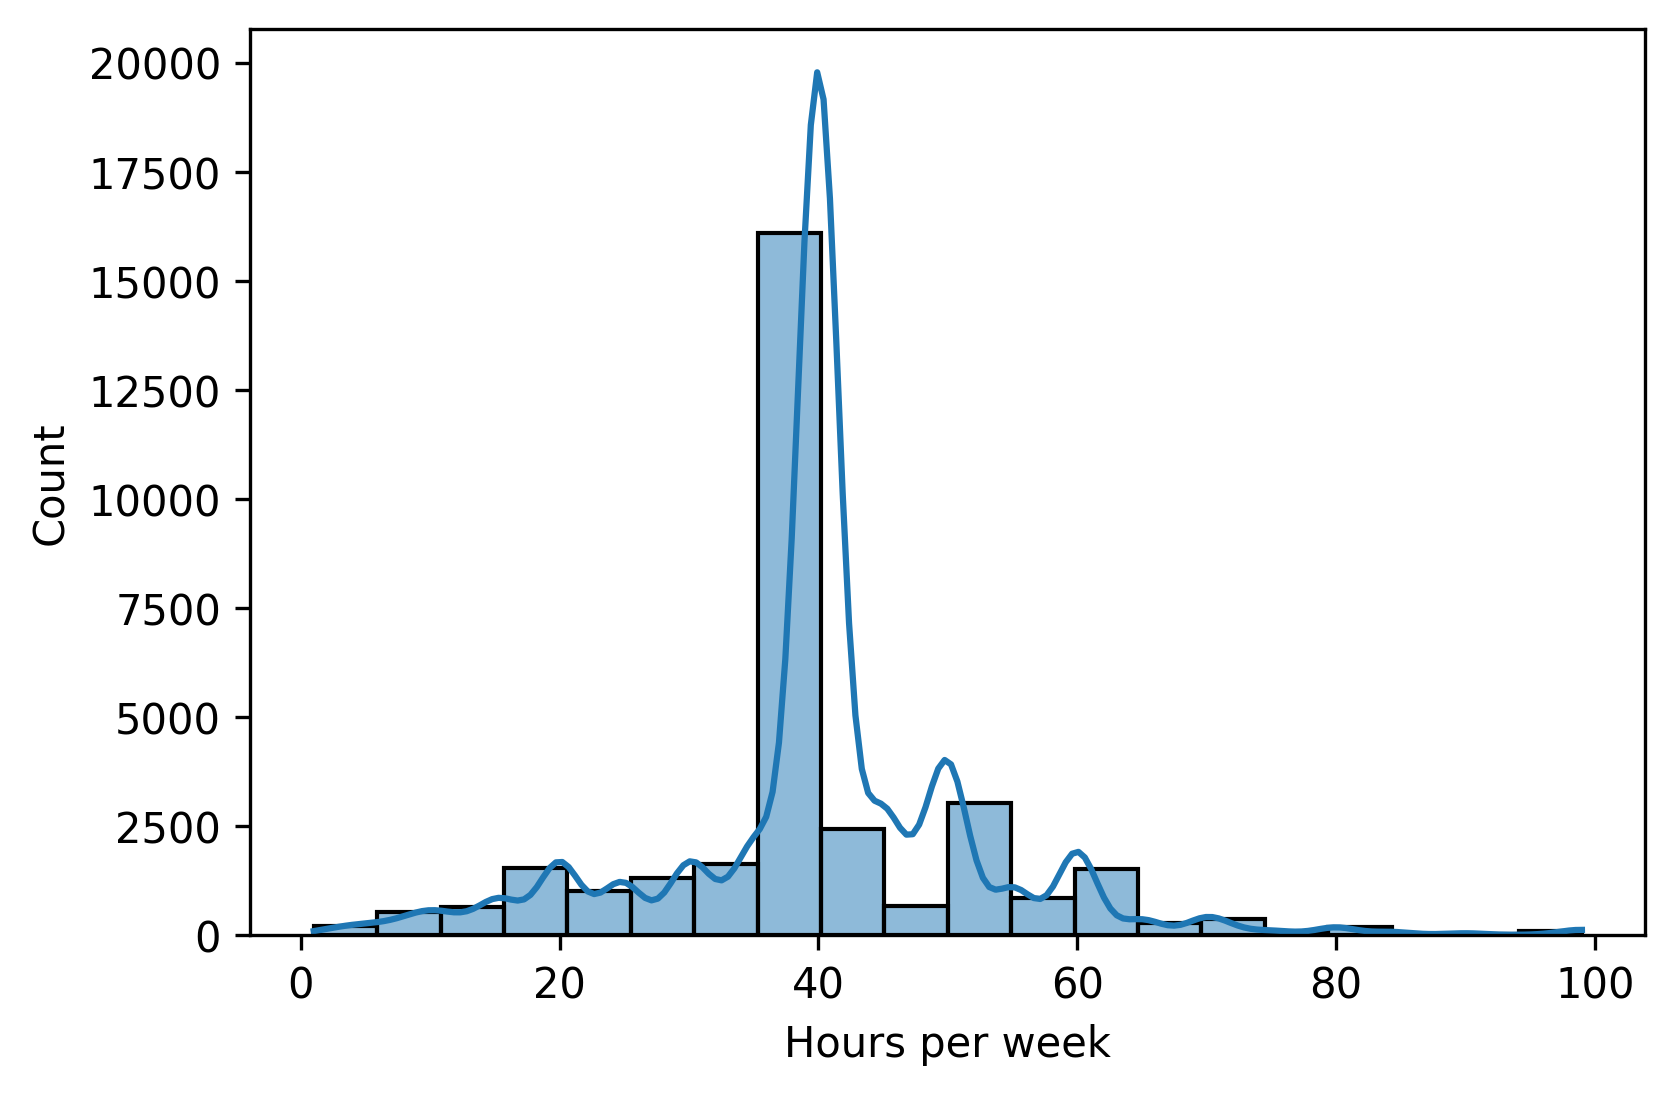

In [ ]:
# Overall age distribution
sns.histplot(df['hours-per-week'], bins=20, kde=True)
plt.xlabel("Hours per week")
plt.show()
# df.age.hist()

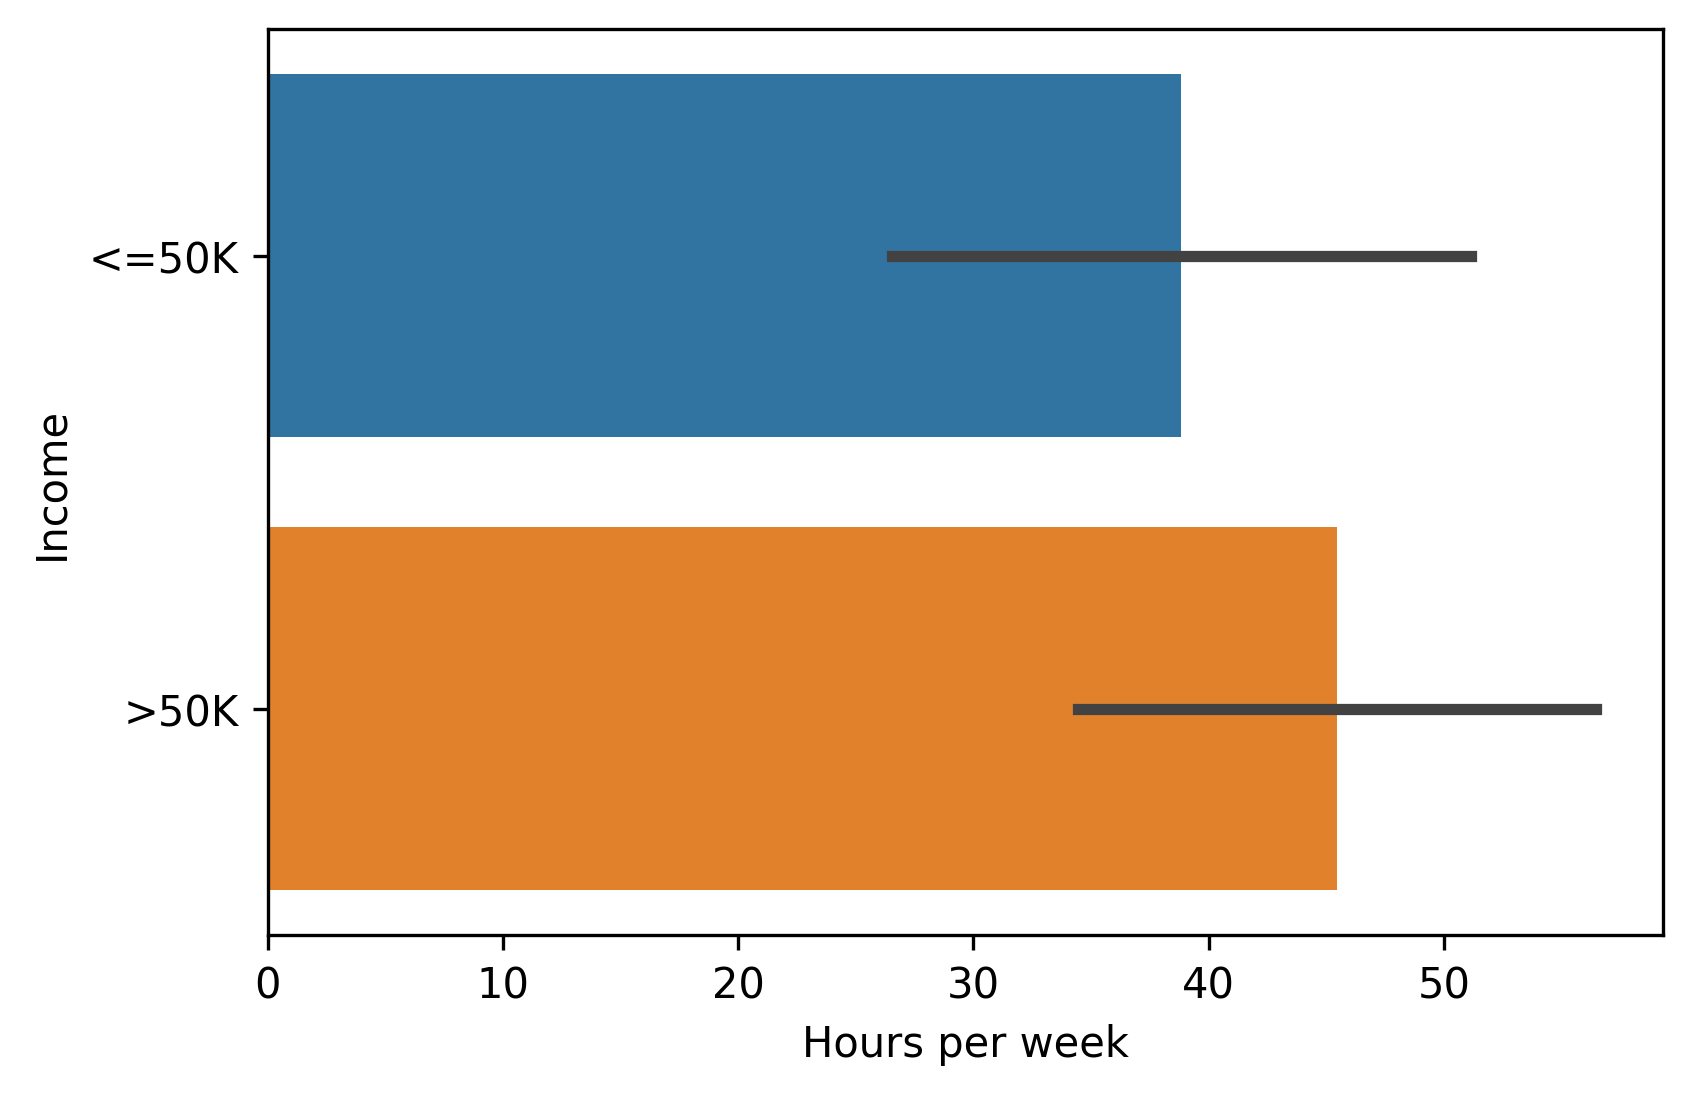

In [ ]:
sns.barplot(data=df, errorbar="sd", x='hours-per-week', y='income',)
plt.xlabel("Hours per week")
plt.ylabel("Income")
plt.show()

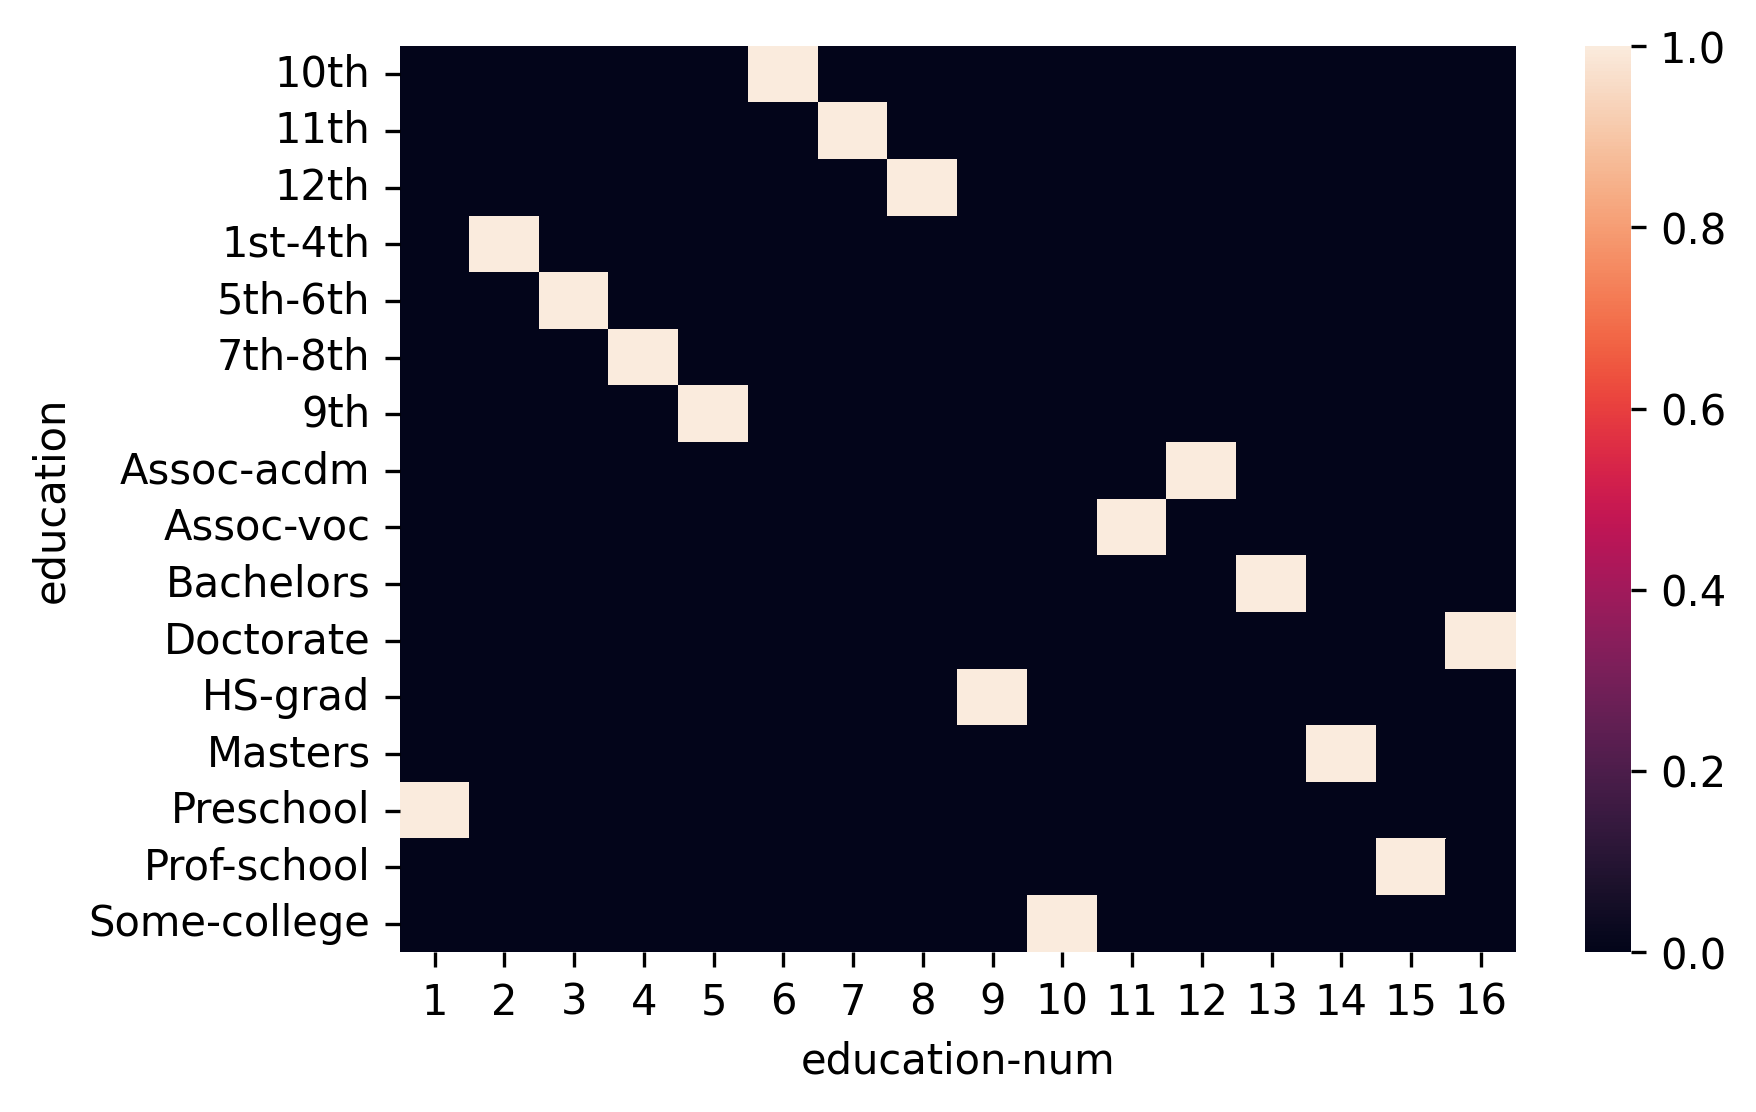

In [ ]:
cross = pd.crosstab(index=df["education"], columns=df["education-num"])
cross = cross.div(cross.sum(axis=1), axis=0)
sns.heatmap(cross)

In [ ]:
df.div(df.sum(axis=1), axis=0)

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [ ]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

### 2. Training model

In [ ]:
df.drop(["fnlwgt"], axis=1, inplace=True)
df.drop(["education-num"], axis=1, inplace=True)
df_test.drop(["fnlwgt"], axis=1, inplace=True)
df_test.drop(["education-num"], axis=1, inplace=True)

#### Training with train-val split and K-fold validation

In [ ]:
# df.drop(df[df["workclass"] == "?"].index, inplace=True)
# df.drop(df[df["occupation"] == "?"].index, inplace=True)
# df.drop(["capital-gain", "capital-loss", "education-num"], axis=1, inplace=True)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
import category_encoders as ce

In [ ]:
X, y = df.drop(["income"], axis=1), df["income"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

numeric_cols = ["age", "hours-per-week", "capital-gain", "capital-loss"]
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]


numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
# hash_transformer = make_pipeline(
#     SimpleImputer(strategy='most_frequent'),
#     OneHotEncoder(handle_unknown='ignore')
# )
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_cols),
    (categorical_transformer, categorical_cols),
    # (hash_transformer, hash_cols)
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=2022))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.8486104713649624
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4945
        >50K       0.71      0.62      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [ ]:
skf = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
scores = []

for train_idxes, val_idxes in skf.split(X, y):
  X_train, X_val = X.iloc[train_idxes], X.iloc[val_idxes]
  y_train, y_val = y.iloc[train_idxes], y.iloc[val_idxes]
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_val)
  score = accuracy_score(y_val, y_pred)
  scores.append(score)

print(f"Average accuracy: {np.mean(scores)}")

Average accuracy: 0.8468414050749381


In [ ]:
params={
    # 'clf__n_estimators':[50, 100, 200, 500],
    # 'clf__max_depth': [2, 3, 4, 5, 6, 7, 8],
    # 'clf__min_samples_split': [2, 3, 4, 5],
    # 'clf__min_samples_leaf': [1, 2, 3, 4, 5]
    
    # 'clf__n_estimators':[100, 200, 500],
    # 'clf__max_depth': [2, 3, 4, 5],
    # 'clf__min_samples_split': [2, 3],
    # 'clf__min_samples_leaf': [1, 2]

    'clf__n_estimators':[50, 100, 200, 500],
    'clf__max_depth': [2, 3, 4, 5],
    'clf__min_samples_split': [2, 3],
    'clf__min_samples_leaf': [1, 2]
}

grid_pipe = sklearn.model_selection.GridSearchCV(pipe, param_grid=params, cv=5, scoring="f1_micro", verbose=1)
grid_pipe.fit(X, y)
print(grid_pipe.best_params_)
print(grid_pipe.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
0.8291821054545606


#### Test with searched hyperparams

In [ ]:
X_test, y_test = df_test.drop(["income"], axis=1), df_test["income"]
y_test = y_test.str[:-1]
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=2022))
])
pipe.fit(X, y)
y_pred = pipe.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8310300350101345
              precision    recall  f1-score   support

       <=50K       0.82      0.99      0.90     12435
        >50K       0.90      0.32      0.47      3846

    accuracy                           0.83     16281
   macro avg       0.86      0.65      0.69     16281
weighted avg       0.84      0.83      0.80     16281

